# Analyze Results

In [75]:
library(tidyverse)

In [76]:
options(repr.plot.height=4)

In [77]:
results = read_csv("build/eval-results.csv")
print(results)

Parsed with column specification:
cols(
  DataSet = col_character(),
  Partition = col_integer(),
  Algorithm = col_character(),
  Succeeded = col_character(),
  BuildTime = col_double(),
  TestTime = col_double(),
  NUsers = col_integer(),
  NAttempted = col_integer(),
  NGood = col_integer(),
  Coverage = col_double(),
  RMSE.ByUser = col_double(),
  RMSE.ByRating = col_double(),
  Predict.nDCG = col_double(),
  TopN.ActualLength = col_double(),
  nDCG = col_double(),
  MRR = col_double(),
  MAP = col_double()
)


# A tibble: 50 x 17
   DataSet Partition Algorithm Succeeded BuildTime TestTime NUsers NAttempted
     <chr>     <int>     <chr>     <chr>     <dbl>    <dbl>  <int>      <int>
 1   ML-1M         3   Popular         Y     0.670    7.269      0          0
 2   ML-1M         5   Popular         Y     0.729    7.251      0          0
 3   ML-1M         4   Popular         Y     0.900    7.025      0          0
 4 ML-100K         1  ItemItem         Y     4.223    6.379    189        945
 5   ML-1M         4  PersMean         Y     1.425    7.322   1208       6040
 6   ML-1M         3  PersMean         Y     1.541    7.254   1208       6040
 7   ML-1M         5  PersMean         Y     1.462    7.304   1208       6040
 8 ML-100K         1   Popular         Y     0.069    0.723      0          0
 9   ML-1M         4    Custom         Y     0.956    7.976   1208       6040
10   ML-1M         3    Custom         Y     0.818    9.224   1208       6040
# ... with 40 more rows, and 9 more variable

## Basic Results

In [78]:
basic_results = results %>%
    # filter(is.na(Rate), is.na(Reg)) %>%
    group_by(DataSet, Algorithm) %>%
    summarize(n=n(), nDCG=mean(nDCG), Rank.nDCG=mean(Predict.nDCG), RMSE=mean(RMSE.ByRating), MAP=mean(MAP))
basic_results

DataSet,Algorithm,n,nDCG,Rank.nDCG,RMSE,MAP
ML-100K,BPR,5,0.020274571,0.9297879,3.1146888,0.019246623
ML-100K,Custom,5,0.046183159,0.9609040,0.9860676,0.016992542
ML-100K,ItemItem,5,0.063334731,0.9639302,0.9426970,0.035797985
ML-100K,PersMean,5,0.046183159,0.9609040,0.9860676,0.016992542
ML-100K,Popular,5,0.186187972,NaN,NA,0.132334611
ML-1M,BPR,5,0.008341754,0.9352251,3.0115275,0.009253842
ML-1M,Custom,5,0.030904533,0.9642051,0.9391222,0.011459371
ML-1M,ItemItem,5,0.042480738,0.9702007,0.8848611,0.023649507
ML-1M,PersMean,5,0.030904533,0.9642051,0.9391222,0.011459371
ML-1M,Popular,5,0.130618984,NaN,NA,0.105693575


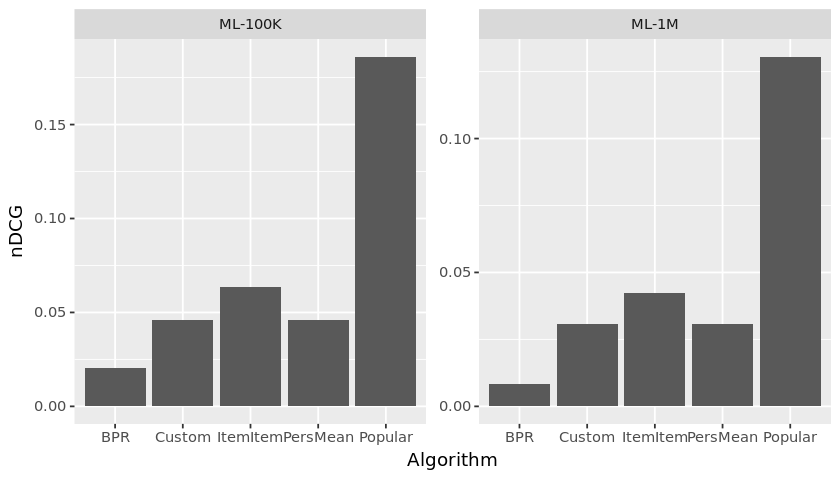

In [81]:
ggplot(basic_results) +
    aes(x=Algorithm, y=nDCG) +
    geom_bar(stat='identity') +
    facet_wrap(~ DataSet, scales="free_y")

## BPR Sampling

We sampled the learning rate and regularization term.

In [80]:
bpr_samp_results = results %>%
    filter(!is.na(Rate), !is.na(Reg)) %>%
    group_by(Rate, Reg) %>%
    summarize(n=n(), nDCG=mean(nDCG), Rank.nDCG=mean(Predict.nDCG), RMSE=mean(RMSE.ByRating), MAP=mean(MAP))
print(bpr_samp_results %>% arrange(-nDCG))

ERROR: Error in filter_impl(.data, quo): Evaluation error: object 'Rate' not found.


In [ ]:
ggplot(bpr_samp_results) +
    aes(x=Rate, y=Reg, color=nDCG) +
    geom_point() +
    scale_x_log10() + scale_y_log10()